In [7]:
import pandas as pd

file_name = "Non_Duplicates"
data = pd.read_csv(f'../data/{file_name}_CleanedUp.csv')

posts = pd.read_csv('list_of_interesting_posts.csv')

In [8]:
# Only keep the data with id in the list of interesting posts
kept_data = data[data['Id'].isin(posts['Id'])]

# Example of ImageUrl : "['https://i.stack.imgur.com/SIWEQ.jpg', 'https://i.stack.imgur.com/nRSLp.jpg']"
# Set the column as an array instead of a string
kept_data['ImageUrl'] = kept_data['ImageUrl'].apply(lambda x: x[1:-1].split(','))

/tmp/ipykernel_96811/2239928687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kept_data['ImageUrl'] = kept_data['ImageUrl'].apply(lambda x: x[1:-1].split(','))


In [9]:
# import os

# # For each post, print the title, alt text and description
# for i, row in kept_data.iterrows():
#     print(f"Post {i+1}")
#     print(f"Alt: {row['AltText']}")
#     print(f"Description: {row['NewBody']}")
#     print("")
#     # Download all images from the ImageUrl array
#     for j, img in enumerate(row['ImageUrl']):
#         os.system(f"wget {img} -O ./images/Temp/{i}_{j}.png")

In [10]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


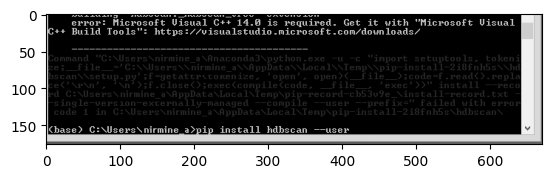

In [11]:
from PIL import Image
import cv2

# Binarize the image
img = cv2.imread('../images/Temp/2_0.png', 0)
# (thresh, img) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Plot the image
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.show()

In [12]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
model = LlavaNextForConditionalGeneration.from_pretrained(
    "llava-hf/llava-v1.6-mistral-7b-hf",
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)

# Check the size of the model in GB
model_size = sum(p.numel() for p in model.parameters()) / 1e9
print(f"Model size: {model_size:.2f} GB")

model.to(device);

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Model size: 7.57 GB


In [13]:
from PIL import Image
import requests

url = "https://github.com/haotian-liu/LLaVA/blob/1a91fc274d7c35a9b50b3cb29c4247ae5837ce39/images/llava_v1_5_radar.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
prompt = "[INST] <image>\nWhat is shown in this image? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to(device)
output = model.generate(**inputs, max_new_tokens=100)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


KeyboardInterrupt: 